In [1]:
#Loading necessary libraries and set seed
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
set.seed(100)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Loading csv files
players <- read_csv('data/players.csv')
sessions <- read_csv('data/sessions.csv')
slice(players, 1:30)
summary(players)
slice(sessions, 1:5)
summary(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

# DSCI 100 - Project 008-35
**Author(s): Nicolo Manalang - 11668084, Abrahem Chaudhry - 21150693, David Falade - 78099298, Henson Ly - 64447188**
# 1. Introduction
A research group in the Department of Computer Science at UBC led by Frank Wood is collecting data about the ways people play video games. More specifically, they are looking into the case problem of predicting usage of a video game research server. The group collected data through setting up a MineCraft server and recorded the players' actions as they play and navigate around the game. The group then stored the data within two csv files called 'players.csv' and 'sessions.csv' (refer to data folder under the 'DSCI_100_Group008-35' directory). The 'players.csv' data records the players' informations such as their age, gender, account email, subscription status, and the amount of hours they played. Meanwhile the 'sessions.csv' data records each game session that occurred during the experiment such as the start and end times in various units of each session, and the player's email that played the session. A more in-depth analysis of the data summaries are found under the 'Methods and Results' section.

The research group then has three broad questions of interest:
Question 1:What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Question 3: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

Our data science group picked Question 1 and created a more specific question that is tailored within our project. Therefore our question is **Can we predict whether a player will subscribe to the newsletter using hours played and age in the players dataset?** To achieve a data analysis on such question, we examined both the 'players.csv' and 'sessions.csv' data to tailor our data analysis methods. As a result, our group only needed to use the 'players.csv' data to successfully and sufficiently create a data analysis for the predictive question.




# 2. Methods and Results
- I will use a K-NN Classification model as the method to answer my question. K-NN Classification is built for answering scenarios such as mine, which uses predictors to predict a categorical variable in question. Few assumptions that are required for an effective model are ensuring the data is balanced in terms of predictors' scales and the amount of observations per class within the categorical variable. Potential limitations and weaknesses within my method are having insufficient number of observations per class, and a tight spread may make the model become ineffective – in which solutions will need to be used to minimize such issues. I will be using the K-NN model through a process in which I split the training data into two (training and testing) in proportions 60/40 as I feel that with the no. of observations (139), a 75/25 split will not give me sufficient data for the testing. I will also split this data as my initial process of building the model to ensure the model is built upon my training data only. I will then scale the training data to continue building my model to ensure I mitigate the potential aforementioned issues with the dataset. Then, I will use a cross-validation (6-fold) for my training data which will be used to find the best K-value – choosing the K-value will be done by the K with the highest reported accuracy after the cross-validation. Therefore, I will not use a single validation set since cross-validation is used. Finally, I will run my processed model to the testing data and analyze the collected metrics to effectively answer my question.

## Data Summary
## players csv 

- Rows: 139 

- Columns: 7

**Summary Statistics**

| Variable | Type | Description | Notes and Key Stats |
|----------|------|-------------| --------------------|
| experience| character | categorizes players between "Beginner", "Amateur", "Regular", "Pro", and "Veteran" |  5.00 different classification labels.|
| subscribe | logical | indicates whether a player is subscribed ("TRUE") or not ("FALSE") to the newsletter | Variable can only be "TRUE" or "FALSE". |
|hashedEmail | character | a hashed email of the email address used by the player(s) | N/A |
| played_hours | double | indicates the amount of time in hours of game played by players | Variable has a mean = 5.85 and max = 223.10. The variable in the dataset also reports values within one decimal place.|
|name | character | indicates the name of the player(s) | All observations start with a capital letter to denote a person's name. |
| gender | character | indicates the preferred gender of players | Can be classified between "Male", "Female", "Prefer not to say", "Non-Binary", "Two-Spirited", or "Other". |
|Age | double | indicates the age of players | The variable reports values within a whole number. Also has 2 N/As in the dataset |

## sessions csv

- Rows: 1535

- Columns: 5

**Summary Statistics** 

| Variable | Type | Description | Notes and Key Stats |
|----------|------|-------------| --------------------|
|hashedEmail | character | a hashed email of the email address used by the player(s) | N/A |
| start_time | character | indicates the start time of a player's session by date and 24-hour time format | The date is in dd/mm/yyyy format. |
| end_time | character | indicates the end time of a player's session by date and 24-hour time format | The date is in dd/mm/yyyy format. |
| original_start_time | double | indicates the start time of a player by UNIX time | The dataset conforms with scientific notation to represent the numbers. Variable mean = 1.719e+12 and max = 1.727e+12. |
| original_end_time | double | indicates the end time of a player by UNIX time | The dataset conforms with scientific notation to represent the numbers. Variable mean = 1.719e+12 and max = 1.727e+12 and has 2 N/As in the dataset.|

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashed_email, name, gender
dbl (2): played_hours, age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashed_email <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ age          <int> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 10
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


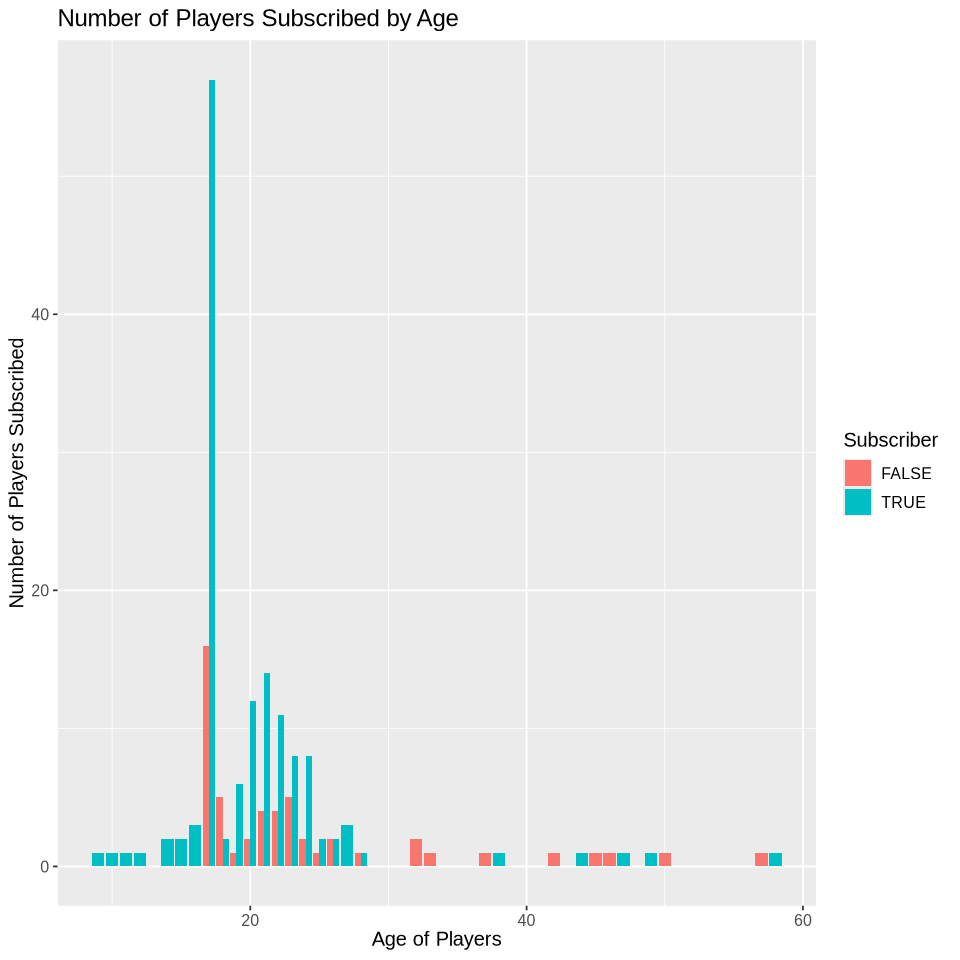

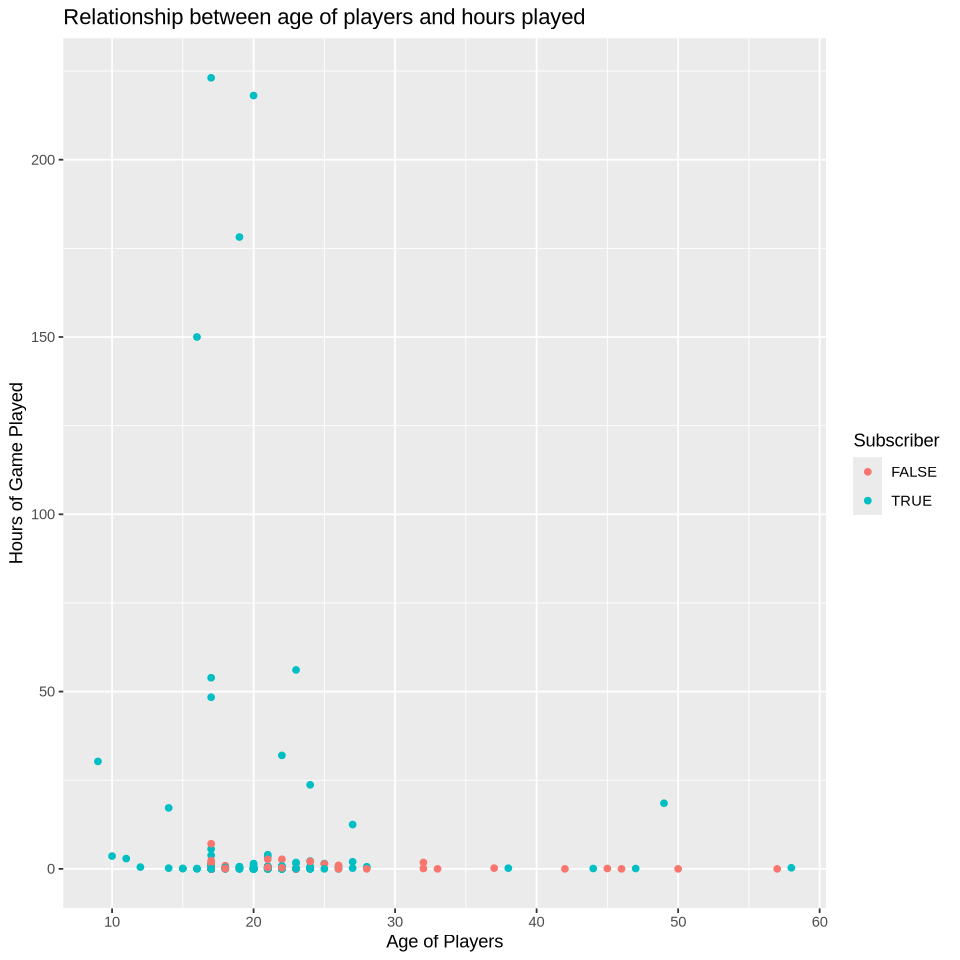

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7435897


          Truth
Prediction FALSE TRUE
     FALSE     1    0
     TRUE     20   57

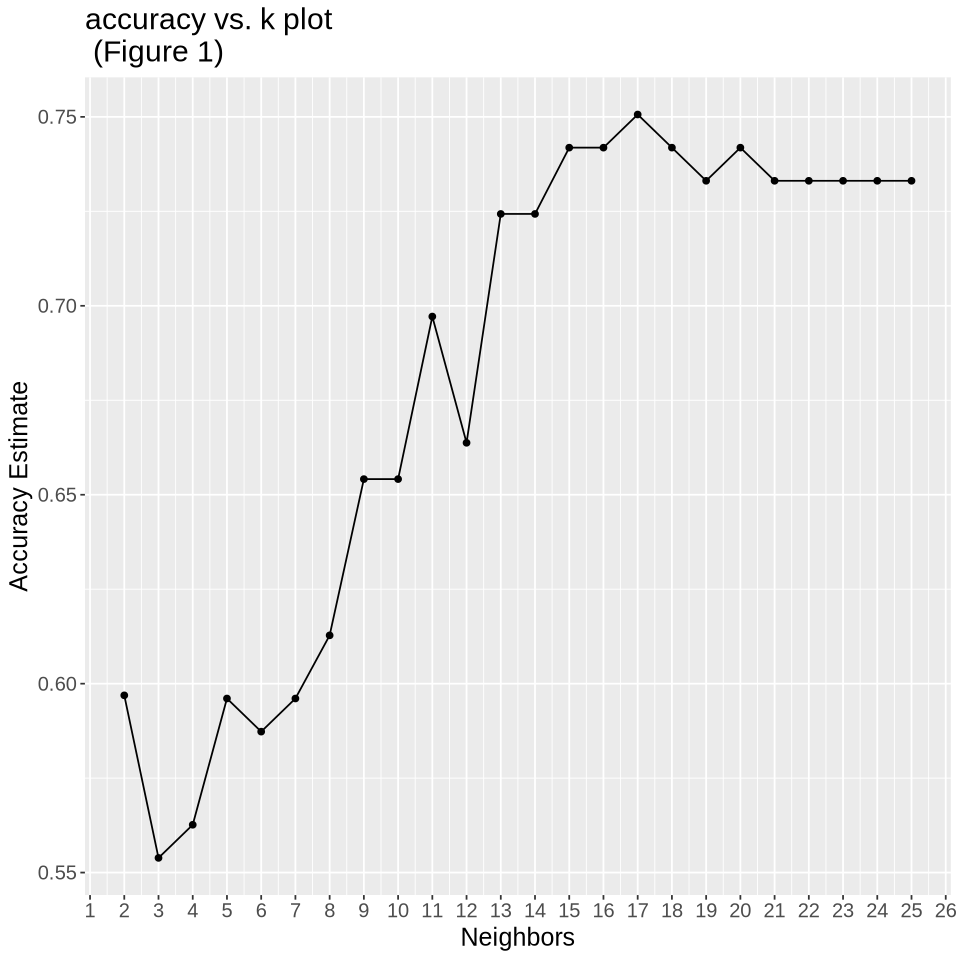

precision
<dbl>
0.7402597


recall
<dbl>
1


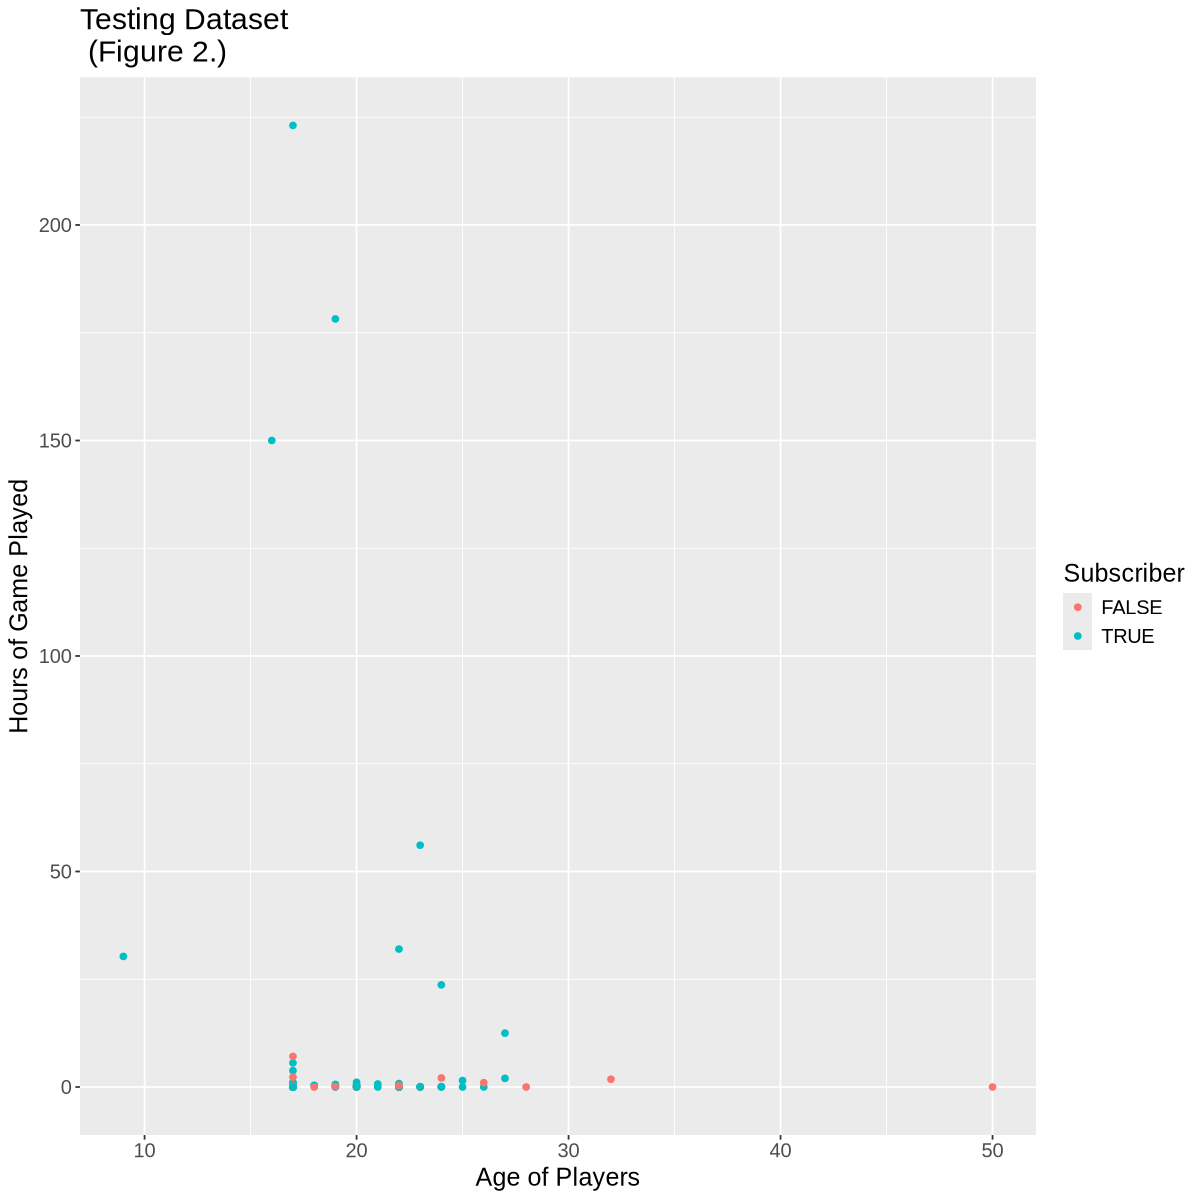

In [5]:
#(Included under #2.)
#Exploratory Data Analysis and Visualizations

#Both the players.csv and sessions.csv files have been loaded into R already as part of the Data Description process. 
#However, I will only need to use the players.csv dataset to appropriately answer my question since sessions.csv
#does not contain any variables apporpriate for my question. 
#Therefore, I will no longer wrangle the sessions.csv dataset.

#Wrangling Data
players_tidy <- read_csv('data/players.csv',    #Reading in data and renaming the column names to a consistent naming structure.
                         col_names = c('experience', 'subscribe', 'hashed_email', #skip = 1 is used to ignore the existing column headers in the dataset.
                                       'played_hours', 'name', 'gender', 'age'), skip = 1) |> 
                         mutate(experience = as.factor(experience),#to convert experience into a factor (fct).
                                gender = as.factor(gender),    #to convert gender into a factor (fct).
                                age = as.integer(age))        #to convert gender into an integer (int).
                
             
glimpse(players_tidy)

#Mean Computation of players dataset

players_averages <- players_tidy |>
                    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE), 
                              mean_age = mean(age, na.rm = TRUE))

players_averages

#Exploratory Visualization 

subscribed_players_plot <- players_tidy |>
                    ggplot(aes(x = age, fill = subscribe)) +
                        geom_bar(position = 'dodge') +
                        labs(title = 'Number of Players Subscribed by Age', 
                             x = 'Age of Players',
                             y = 'Number of Players Subscribed',
                             fill = 'Subscriber') +
                        theme(text = element_text(size = 12))
options(repr.plot.height = 8, repr.plot.width = 8)

subscribed_players_plot

#Despite the peak of subscribers at a certain demographic, there is a broad and even 
#distribution between players that are subscribed and not subscribed across the ages of players.

played_hours_plot <- players_tidy |>
                ggplot(aes(x = age, y = played_hours, color = subscribe)) +
                    geom_point() +
                    labs(title = 'Relationship between age of players and hours played',
                         x = 'Age of Players',
                         y = 'Hours of Game Played',
                         color = 'Subscriber') 
                    theme(text = element_text(size = 10))

played_hours_plot

#Looking at my two predictors, I will definitely need to scale the dataset as the difference in scales of 
#Age and Hours of Game Played will skew the model I will use. Another important concept within the visualization 
#is that I may run into class imbalance – requiring solutions to mitigate the issue.



# Data Analysis 

#Data Wrangling 

#(csv file has already been loaded above with modifications applied,
#and therefore unnecessary to re-load again)

#Turning Class variable (subscribe) into a factor to fit the K-NN Classification engine and removing 
#the 2 observations with NA on the age variable
players_fully_tidy <- players_tidy |>
                        mutate(subscribe = as.factor(subscribe)) |>
                        filter(!is.na(age)) #We will know that we successfully removed NAs if the nnumber of 
                                            #observations within the dataset goes down by 2.
#players_fully_tidy


#Splitting the training and testing data 
players_split <- initial_split(players_fully_tidy, prop = 0.60, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

#slice(players_training, 1:30)
#slice(players_testing, 1:30)


#Model Recipe and Tuning Spec

players_recipe <- recipe(subscribe ~ played_hours + age, data = players_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
                    set_engine('kknn') |>
                    set_mode('classification')

#6-fold cross-validation on the training set (Choosing the best K)

players_vfolds <- players_training|>
                    vfold_cv(v = 6, strata = subscribe) 
#players_vfolds

k_vals <- tibble(neighbors = seq(from = 2, to = 25, by = 1))

players_fit <- workflow() |>
                add_recipe(players_recipe) |>
                add_model(players_spec) |>
                tune_grid(resamples = players_vfolds, grid = k_vals) |>
                collect_metrics()
#players_fit

accuracies_k <- players_fit |>
                filter(.metric == 'accuracy')

#accuracies_k

#Figure 1.
set.seed(100)
cross_val_plot <- accuracies_k |>
                    ggplot(aes(x = neighbors, y = mean)) +
                        geom_point() +
                        geom_line() +
                        labs(x = 'Neighbors', 
                             y = 'Accuracy Estimate', 
                             title = 'accuracy vs. k plot \n (Figure 1)') +
                        scale_x_continuous(breaks = seq(1, 30, by = 1)) +
                        theme(text = element_text(size = 15))
   #NOTE: Legend is unapplicable to this plot                    
cross_val_plot

best_k <- accuracies_k |>      #Pulls the best K-value (the value with the highest accuracy)
            slice_max(mean, n=1) |>
            pull(neighbors)
#best_k

#Retraining Data with the selected K-value

players_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = best_k) |>
                        set_engine('kknn') |>
                        set_mode('classification')

players_best_fit <- workflow() |>
                    add_recipe(players_recipe) |> #We can still use the same recipe since it remained unchanged.
                    add_model(players_best_spec) |>
                    fit(data = players_training)

#Predicting Testing Dataset and Collecting Metrics

players_predictions <- predict(players_best_fit, players_testing) |>
                        bind_cols(players_testing)

players_accuracy_metric <- players_predictions |>    #accuracy metric
                            metrics(truth = subscribe, estimate = .pred_class) |>
                            filter(.metric == 'accuracy')
players_accuracy_metric

players_conf_mat <- players_predictions |>  #confusion matrix 
                     conf_mat(truth = subscribe, estimate = .pred_class)
players_conf_mat

players_testing_plot <- players_testing |>  #visualizing the testing data
                        ggplot(aes(x = age, y = played_hours, color = subscribe)) +
                            geom_point() +
                            labs(x = 'Age of Players',
                                 y = 'Hours of Game Played',
                                 color = 'Subscriber',
                                 title = 'Testing Dataset \n (Figure 2.)') +
                            theme(text = element_text(size = 15)) +
                            scale_fill_distiller(palette = 'Set3')
options(repr.plot.width = 10, repr.plot.height = 10)

players_testing_plot

#Manual Calculations of other metrics (Precision & Recall)
precision_calculation <- 57/(57 +20)

precision <- tibble(precision = precision_calculation)
precision

recall_calculation <- 57/(57 + 0)

recall <- tibble(recall = recall_calculation)
recall

# 3. Discussion

### Summary

In this study, we employed a K-NN classification algorithm to predict whether a video game player would subscribe to a newsletter, utilizing Age and Hours Played as predictors. We then wrangled the players.csv data to tailor our analysis and decided to remove observations that had 'Not Available (N/A)' stated on any variables used for the predictors (in this case Age and Hours Played). After preprocessing the data to center and scale the variables, we trained the model using a 60/40 split and optimized the number of neighbors (K) via a 6-fold cross-validation and visualized the K accuracies under Figure 1.

The final model applied to the testing set yielded an accuracy of approximately 74.4%. However by summing the prediction rows in the truth table, we observe the model predicted "True" (Subscriber) 77 times, yet predicted "False" (Non-subscriber) only once. We also analyzed other metrics used for K-NN classification algorithm such as recall and precision using a confusion matrix and manually calculated each metric to produce a numerical value. Consequently, the model achieved a precision of 74.0% and while the model achieved a perfect recall score of 1.0 (successfully capturing all 57 actual subscribers), it demonstrated near-zero specificity, correctly identifying only 1 out of the 21 non-subscribers.

### Expectations

We had theorized we would see clear groups based on age and playtime, which would perfectly separate subscribers from non-subscribers. We expected the K-NN algorithm to pick up on those patterns and make good, balanced predictions.

However, the major issue was the significant class imbalance in the data. We had 144 subscribers but only 52 non-subscribers. Because the "Subscriber" group was so dominant, the K-NN algorithm, which relies on majority voting, took the path of least resistance. The model essentially learned that the easiest and most statistically correct prediction was to simply guess "Subscriber" almost every single time, regardless of a person's age or playtime. This can be seen with Figure 2 where there are clearly not enough established patterns within the data for the K-NN Classification algorithm model to pick up and properly predict with confidence. We expected that the scaling and centering of the data would help with establishing patterns for the model. We also expected that the sample size used in players.csv (n = 192), would be a sufficient number of observations to answer our question with our specified parameters.

### Impact of Findings

The data indicates that the predictors Age and Hours Played (as currently used) are insufficient to build a K-NN classification algorithm model to answer our question. While we can achieve high accuracy, the data explains that this is driven by the sheer volume of subscribers rather than a strong predictive relationship between the variables. The data suggests that subscription status is likely driven by factors other than just age and play time, or that the weight from these variables is being drowned out by the class imbalance. Additionally, the data suggests that the sample size of (n = 192) recorded in players.csv cannot sufficiently be predicted using a K-NN classification model with only two predictors due to its small size. 

These findings can have an impact on the future directions for the research group led by Frank Wood since the data tells us that the sample sizing is still too small and many factors may be contributing to the subscription for the game as stated with their interest in Question 1 (refer to Introduction).

### Future Directions

To enhance the predictive power of this model, many approaches can be made to address fundamental data-related limitations.

First, the imbalance in the ratio of "yes"(subscribe) to "no"(not subscribed) outcomes must be mitigated. This can either be done through undersampling the majority class ("yes" data points) or oversampling the minority class ("no" data points). This rebalancing is critical to make the model learn the discriminative features of the minority class, rather than defaulting to the highly prevalent majority class prediction.

Second, the reliability of the current performance metrics is questionable due to the small sample size ($n=196$) and the reliance on a single train-test split. To establish statistical confidence in the model's performance scores, perhaps methods such as bootstrapping should be employed. This involves repeatedly resampling the data with replacement to generate a distribution of performance metrics, yielding a confidence interval for the true model score rather than a single, potentially spurious, point estimate. Through bootstrapping or any other inference models that require us to upsample data, we are able to increase the number of observations within the players.csv data and further answer our group's question: **Can we predict whether a player will subscribe to the newsletter using hours played and age in the players dataset?** with much more detail such as having more predictors and more observations. This way, we can see whether patterns within the players.csv data truly emerges and help answer the questions of Frank Wood's research group through detailed data analysis.


# 4. References
The Pacific Laboratory for Artificial Intelligence (PLAI). (2018). Pacific laboratory for artificial      intelligence. The University of British Columbia. https://plai.cs.ubc.ca
